<a href="https://colab.research.google.com/github/Leo-Cloud-98/Proyecto-Final-Data-Science-I---Coderhouse/blob/main/ProyectoDSParteI_Tavitian_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ventas Superstore

El presente proyecto utiliza el dataset Superstore, una base de datos ficticia que permite realizar un análisis de ventas y rentabilidad de este comercio en los EE.UU. Este conjunto de datos contiene información detallada de transacciones comerciales, abarcando más de 10.000 registros y 18 variables que incluyen datos sobre clientes, categorías y subcategorías de productos, ventas, descuentos, ganancias, devoluciones, ubicación geográfica, fechas de compra y de envío, tipo de transporte y prioridad de pedido. Esta riqueza de información permite realizar un Análisis Exploratorio de Datos –EDA— con suficiente profundidad para identificar patrones relevantes y responder a preguntas de negocio.

La elección de este dataset se fundamenta en tres razones principales:
1.	**Cobertura integral de la operación comercial:** incluye variables que permiten analizar la relación entre factores como descuentos, tipo de envío, prioridad de pedido y región, con resultados de ventas y rentabilidad.
2.	**Estructura apta para análisis considerando varias variables:** la presencia de datos financieros –ventas, ganancia, descuento—, categóricas –segmento de clientes, categoría, región— y temporales –fechas de pedido y de envío— facilita la exploración desde múltiples perspectivas.
3.	**Pertinencia para escenarios reales:** aunque es un dataset ficticio, reproduce la complejidad de datos que manejaría una empresa minorista o también de e-commerce, por lo que sus conclusiones pueden extrapolarse a otros contextos de negocios.

El objetivo principal del análisis es comprender qué factores afectan las ventas y la rentabilidad de la empresa, así como identificar patrones en las devoluciones y en la logística de envíos. De manera más específica, se busca:
•	Evaluar el impacto del descuento sobre las ganancias y determinar si existe un punto óptimo que maximice la rentabilidad.
•	Comparar ventas y ganancias entre diferentes categorías y subcategorías de producto para identificar áreas de alto y bajo rendimiento.
•	Analizar si la prioridad del pedido y el tipo de envío influyen en la probabilidad de devolución.
•	Detectar variaciones en las ventas según regiones y segmentos de clientes.
•	Explorar posibles patrones temporales o estacionales en las transacciones.

Para abordar estas preguntas, se aplicarán técnicas de análisis exploratorio mediante Python, utilizando librerías como **Numpy, Pandas, Matplotlib y Seaborn.** Se emplearán diversas visualizaciones, junto con estadísticas descriptivas, para extraer información significativa.

## Hipótesis
**Hipótesis Nula (H0):** no existen diferencias significativas en el promedio de ventas por pedido entre las regiones (East, Central, South, West).

**Hipótesis Alternativa (H1):** el promedio de ventas por pedido difiere significativamente entre regiones, siendo esperable que la región West concentre un promedio de ventas superior al resto de las regiones.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/Leo-Cloud-98/Proyecto-Final-Data-Science-I---Coderhouse/refs/heads/main/SuperstoreCleaned.csv'
df = pd.read_csv(url)
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country_Region,City,...,First Order,Manufacturer,Order Priority,Gender,Holiday ID,Is Holiday,Delivery Date,Return ID,Is Returned,Shipment Status
0,9406,US-2024-148985,11-11-2024 00:00,15-11-2024 00:00,Second Class,TB-21190,Thomas Brumley,Home Office,United States,Los Angeles,...,27-12-2021 00:00,DAX,Medium,Male,44,National Holiday,20-11-2024 00:00,0,False,On Time
1,9409,US-2024-110842,11-11-2024 00:00,16-11-2024 00:00,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Los Angeles,...,11-02-2021 00:00,Belkin,Medium,Male,44,National Holiday,19-11-2024 00:00,0,False,Delayed
2,9410,US-2024-157483,11-11-2024 00:00,18-11-2024 00:00,Standard Class,EP-13915,Emily Phan,Consumer,United States,Detroit,...,06-07-2021 00:00,Boston,Low,Female,44,National Holiday,21-11-2024 00:00,0,False,Delayed
3,9411,US-2024-110842,11-11-2024 00:00,16-11-2024 00:00,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Los Angeles,...,11-02-2021 00:00,Ibico,Medium,Male,44,National Holiday,19-11-2024 00:00,0,False,Delayed
4,1702,US-2021-144078,25-11-2021 00:00,29-11-2021 00:00,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Los Angeles,...,11-03-2021 00:00,Hon,Medium,Male,10,National Holiday,02-12-2021 00:00,0,False,Delayed
5,1703,US-2021-127446,25-11-2021 00:00,30-11-2021 00:00,Standard Class,MC-17590,Matt Collister,Corporate,United States,Arlington,...,20-05-2021 00:00,Master-Caster,Medium,Male,10,National Holiday,03-12-2021 00:00,0,False,Delayed
6,1704,US-2021-122588,25-11-2021 00:00,27-11-2021 00:00,Second Class,AR-10540,Andy Reiter,Consumer,United States,Woonsocket,...,25-11-2021 00:00,DAX,High,Male,10,National Holiday,02-12-2021 00:00,0,False,On Time
7,9640,US-2024-128300,24-11-2024 00:00,26-11-2024 00:00,Second Class,RS-19765,Roland Schwarz,Corporate,United States,Summerville,...,07-04-2021 00:00,Motorola,Medium,Male,0,Weekend Holidays,01-12-2024 00:00,0,False,On Time
8,9553,US-2024-158876,19-11-2024 00:00,21-11-2024 00:00,Second Class,AB-10150,Aimee Bixby,Consumer,United States,Carrollton,...,05-03-2021 00:00,Boston,Medium,Female,0,Business Working Day,26-11-2024 00:00,0,False,On Time
9,2611,US-2022-163923,30-05-2022 00:00,03-06-2022 00:00,Standard Class,BD-11560,Brendan Dodson,Home Office,United States,Springfield,...,30-05-2022 00:00,Imation,High,Male,15,National Holiday,06-06-2022 00:00,0,False,Delayed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           10194 non-null  int64  
 1   Order ID         10194 non-null  object 
 2   Order Date       10194 non-null  object 
 3   Ship Date        10194 non-null  object 
 4   Ship Mode        10194 non-null  object 
 5   Customer ID      10194 non-null  object 
 6   Customer Name    10194 non-null  object 
 7   Segment          10194 non-null  object 
 8   Country_Region   10194 non-null  object 
 9   City             10194 non-null  object 
 10  State_Province   10194 non-null  object 
 11  Postal Code      10194 non-null  object 
 12  Region           10194 non-null  object 
 13  Product ID       10194 non-null  object 
 14  Category         10194 non-null  object 
 15  Sub-Category     10194 non-null  object 
 16  Product Name     10194 non-null  object 
 17  Sales       

In [94]:
df['Row ID'] = df['Row ID'].astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           10194 non-null  int64  
 1   Order ID         10194 non-null  object 
 2   Order Date       10194 non-null  object 
 3   Ship Date        10194 non-null  object 
 4   Ship Mode        10194 non-null  object 
 5   Customer ID      10194 non-null  object 
 6   Customer Name    10194 non-null  object 
 7   Segment          10194 non-null  object 
 8   Country_Region   10194 non-null  object 
 9   City             10194 non-null  object 
 10  State_Province   10194 non-null  object 
 11  Postal Code      10194 non-null  object 
 12  Region           10194 non-null  object 
 13  Product ID       10194 non-null  object 
 14  Category         10194 non-null  object 
 15  Sub-Category     10194 non-null  object 
 16  Product Name     10194 non-null  object 
 17  Sales       

In [6]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000
mean,247.124769,3.791838,0.155385,60.515975
std,664.070045,2.228317,0.206249,236.619294
min,0.990000,1.000000,0.000000,-3840.000000
25%,19.152500,2.000000,0.000000,5.482500
50%,59.970000,3.000000,0.200000,14.780000
75%,220.915000,5.000000,0.200000,46.290000
max,22638.480000,14.000000,0.800000,8400.000000


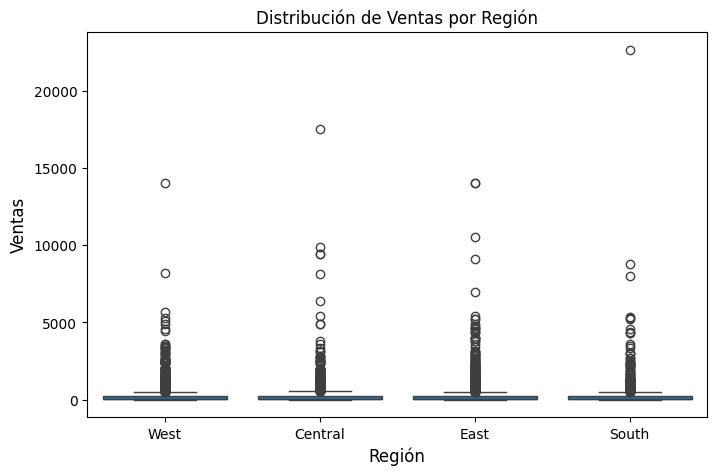

In [7]:
# Boxplot: nos permiete observar la distribución de ventas por region y su vez nos permite identificar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Sales", data=df)
plt.title("Distribución de Ventas por Región")
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.show()

* Se puede observar que la mayoría de los datos están concentrados en rangos bajos de ventas, por debajo de 1.000 y que las cajas son bajas por lo tanto los valores típicos son pequeños.

* Con relación a los outliers hay muchos puntos por encima de los bigotes, lo que indica ventas significativamente más altas que la mayoría. Por ej.: en las regiones Central y East hay valores que superan los 15.000, y en las regiones West y South algunos superan los 8.000 o 10.000. Esto puede sugerir que algunas transacciones generan ventas muy grandes en comparación con el promedio.


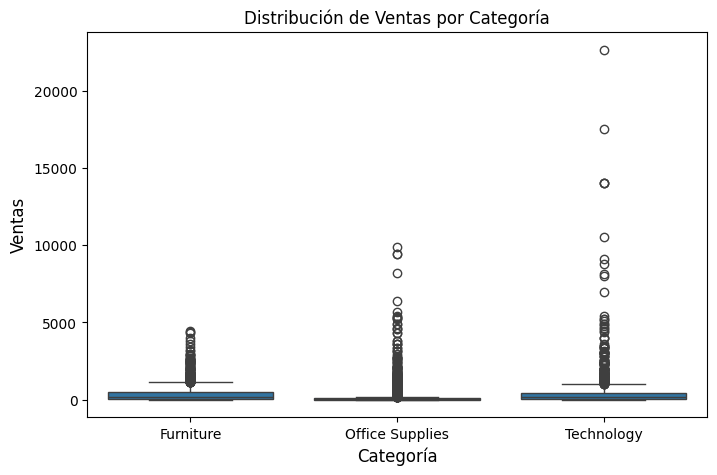

In [8]:
# Boxplot: nos permiete observar la distribución de ventas por Categoría y su vez nos permite identificar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x="Category", y="Sales", data=df)
plt.title("Distribución de Ventas por Categoría")
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.show()

* Al igual que el gráfico anterior se puede observar que los valores típicos son pequeños.
* Respecto a los Outliers se puede observar, que si bien las tres catergorías tienen Outliers, en la categoría de Tecnology se observan la mayor cantidad y tambien los más extremos. La cartegoria Furniture muestra los Outliers menos extremos

/tmp/ipython-input-206671684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Sales", data=df, estimator=np.sum, palette='viridis', errorbar=None)


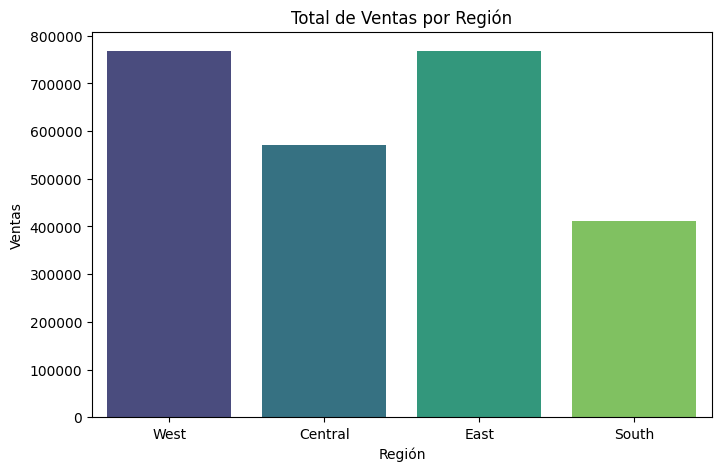

,Region,Sales
0,Central,571319.32
1,East,768920.05
2,South,411928.36
3,West,767022.17


In [11]:
# Barplot: totalizamos las ventas por región
plt.figure(figsize=(8, 5))
sns.barplot(x="Region", y="Sales", data=df, estimator=np.sum, palette='viridis', errorbar=None)
plt.title("Total de Ventas por Región")
plt.xlabel('Región')
plt.ylabel('Ventas')
plt.show()

Total_Ventas_Region = df.groupby(['Region'])['Sales'].sum().reset_index()
Total_Ventas_Region

Se puede observar que el total de ventas para las regiones East y West es similiar y, a su vez, existe una importante diferencia con respecto a las otras dos regiones. Siendo South la región con menos ventas.

/tmp/ipython-input-1912244941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Sales", data=df, estimator=np.mean, palette='viridis', errorbar=None)


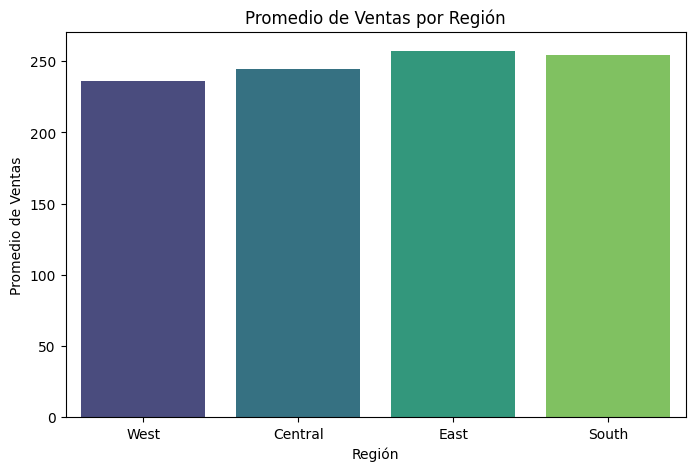

,Region,Sales
0,Central,244.676368
1,East,257.508389
2,South,254.276765
3,West,235.789170


In [10]:
# Barplot: promedio de ventas por región
plt.figure(figsize=(8, 5))
sns.barplot(x="Region", y="Sales", data=df, estimator=np.mean, palette='viridis', errorbar=None)
plt.title("Promedio de Ventas por Región")
plt.xlabel('Región')
plt.ylabel('Promedio de Ventas')
plt.show()

Promedio_Ventas_Region = df.groupby(['Region'])['Sales'].mean().reset_index()
Promedio_Ventas_Region

* A diferencia del gráfico anterior, cuando analizamos las ventas promedio por regiones no se observa grandes diferencias entre las mismas.

* La región West es la que tiene el promedio más bajo de ventas.

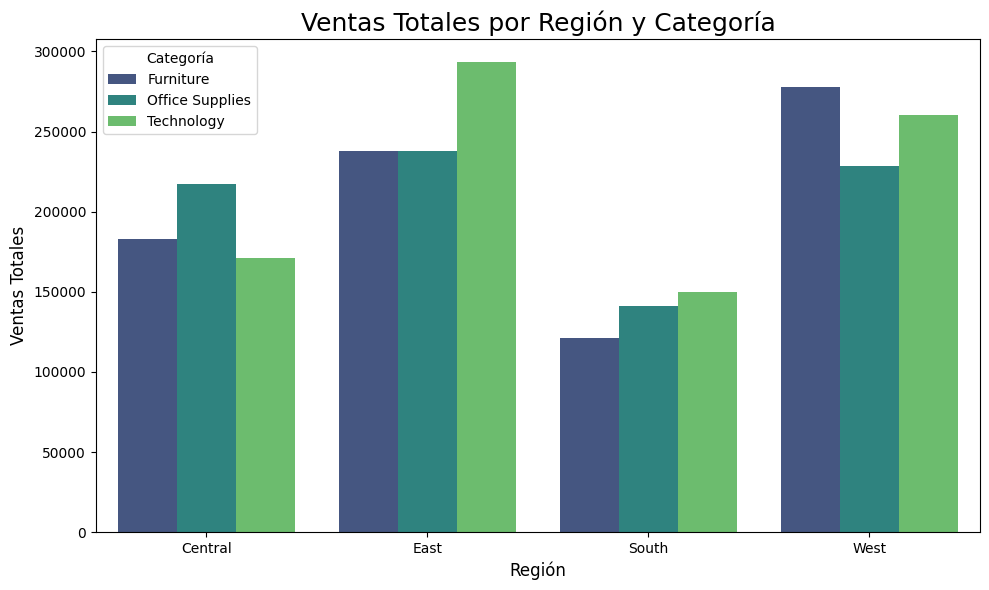

In [12]:
# Barplot: totalizamos las ventas por región y Categoría
ventas_totales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_totales, x='Region', y='Sales', hue='Category', palette='viridis')
plt.title('Ventas Totales por Región y Categoría', fontsize=18)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

Se puede observar que en la región East la categoría que más ventas tiene es

* Al igual que vimos anteriormente, la región East es la que tiene mayores ventas. Las cuales se encuentran lideradas por la categoría Tecnology, que tiene la mayor cantidad de Outiliers y los más extremos.
* En la región West las ventas están lideradas por la categoría Furniture
* Las ventas de la región central estan lideradas por la categoría Office Suplies
* La región South es la que tien las ventas más bajas y están lideradas por la categaría Tecnology.



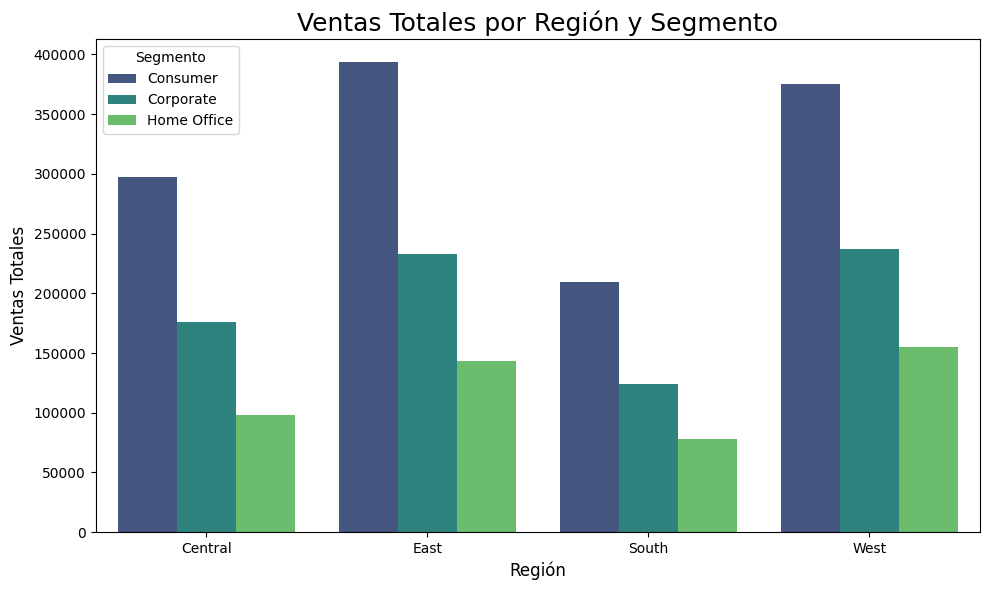

In [13]:
# Barplot: totalizamos las ventas por región y Segmento
ventas_totales = df.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_totales, x='Region', y='Sales', hue='Segment', palette='viridis')
plt.title('Ventas Totales por Región y Segmento', fontsize=18)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

* En todas las regiones, Consumer es el segmento con mayores ventas, mientras que Home Office es el segmento de menores ventas.

In [117]:
df.groupby("Region")["Sales"].agg(["mean","median","std","count","max","min"])

,mean,median,std,count,max,min
Region,,,,,,
Central,244.676368,59.20,684.832673,2335,17499.95,1.48
East,257.508389,59.61,688.495068,2986,13999.96,1.24
South,254.276765,58.45,800.992270,1620,22638.48,1.68
West,235.789170,61.40,539.301112,3253,13999.96,0.99


* Se puede observar que existe una importante diferencia entre la Media y la Mediana, en todas las regiones, lo que puede implicar la existencia de Outliers -como vimos anteriormente, cuando identificamos la existencia de Outliers mediante los boxplot-.
* La elevada Desviación Estandar -para todas las regiones-, si la comparamos con la Media, nos indica que existe una fuerte dispersión entre los datos analizados.
* Considerando los datos observados se puede observar que la región West es la que tiene los datos menos dispersos y a su vez la región que cuenta con la mayor cantidad de ventas.
* A contraposición del punto anterior la región South es la que presenta los datos más dispersos y la que tiene menos ventas.

##Conclusiones Preliminares:
1. En los datos analizados se observa la existencia de una importante cantidad de Outiers y de una magnitud significativa lo cual afecta no solo la Media de las Ventas por Regiones sino tambien el analisis que se puede realizar sobre las ventas totales. Tambien se observa una importante variabilidad en los datos -observado por los valores de la Desviación Estandar por Regiones-.
2. Se pudo determinar que si bien todas las categorías de prodcutos tienen Outliers la mayor cantidad, y los más significativos, provienen de la categoría Technology. Esto vinculado con el Total de Ventas por Región y con las Ventas Promedio por Región pueden ayudarnos a explicar porque la región East es la que tiene las mayores Ventas Totales ($768.920,05) -siendo que esta región no es la que tiene la mayor cantidad de ventas- y el mayor promedio de ventas (257,51).
3. Con relación a las hipotesis planteadas originalmente se podria concluir que, con relación a la Hipotesis Original, no existen diferencias significativas entre las ventas promedio entre las diferentes regiones, pero que esto esta afectado por la existencia de Outliers.
4. Con respecto al punto anterior, si el lugar de considerar la Media tomaramos la Mediana -para excluir los Outiliers del análisis- podriamos arribar a una conclusión similar ya que no existe una diferencia significativa entre las Mediana de las Ventas por Regiones.